In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import (
    LinearRegression,
    Lasso,
    Ridge,
    ElasticNet,
    LogisticRegression,
)
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import (
    AdaBoostRegressor,
    GradientBoostingRegressor,
    RandomForestRegressor,
)
from xgboost import XGBRegressor
from catboost import CatBoostRegressor

In [27]:
df = pd.read_csv("data/stud.csv")

In [28]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [29]:
X = df.drop("math_score", axis=1)

In [30]:
X

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,74
1,female,group C,some college,standard,completed,90,88
2,female,group B,master's degree,standard,none,95,93
3,male,group A,associate's degree,free/reduced,none,57,44
4,male,group C,some college,standard,none,78,75
...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,99,95
996,male,group C,high school,free/reduced,none,55,55
997,female,group C,high school,free/reduced,completed,71,65
998,female,group D,some college,standard,completed,78,77


In [31]:
y = df["math_score"]

In [32]:
y

0      72
1      69
2      90
3      47
4      76
       ..
995    88
996    62
997    59
998    68
999    77
Name: math_score, Length: 1000, dtype: int64

In [33]:
num_features = X.select_dtypes(exclude="object").columns
cat_features = X.select_dtypes(include="object").columns

In [34]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder", oh_transformer, cat_features),
        ("StandardScaler", numeric_transformer, num_features),
    ]
)

In [35]:
X = preprocessor.fit_transform(X)

In [36]:
X.shape

(1000, 19)

In [37]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [38]:
X_train.shape

(800, 19)

In [39]:
X_test.shape

(200, 19)

In [40]:
from sklearn.metrics import r2_score, mean_absolute_error, root_mean_squared_error, mean_squared_error

In [50]:
def model_evaluation(true_values, predicted_values):
    r2 = r2_score(true_values,predicted_values)
    mae = mean_absolute_error(true_values,predicted_values)
    rmse = root_mean_squared_error(true_values,predicted_values)
    mse = mean_squared_error(true_values,predicted_values)
    return r2,mae,rmse,mse
    

In [42]:
models = {
    "LinearRegression" : LinearRegression(),
    "Lasso":Lasso(),
    "Ridge":Ridge(),
    "ElasticNet":ElasticNet(),
    "LogisticRegression":LogisticRegression(),
    "SVR": SVR(),
    "KNeighborsRegressor": KNeighborsRegressor(),
    "RandomForestRegressor": RandomForestRegressor(),
    "DecisionTree": DecisionTreeRegressor(),
    "AdaBoostRegressor": AdaBoostRegressor(),
    "GradientBoostingRegressor":GradientBoostingRegressor(),
    "XGBRegressor":XGBRegressor(),
    "CatBoostRegressor":CatBoostRegressor()
}

In [53]:
model_list = []
model_r2_score = []
for name,model in models.items():
    model.fit(X_train,y_train)
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    model_train_r2,model_train_mae,model_train_rmse,model_train_mse = model_evaluation(y_train,y_train_pred)
    model_test_r2,model_test_mae,model_test_rmse,model_test_mse = model_evaluation(y_test,y_test_pred)
    model_list.append(name)
    model_r2_score.append(model_test_r2)

    print("-------------")
    print("Model Train Evaluation")
    print(name)
    print(f"R2 Score: {model_train_r2}")
    print(f"MAE: {model_train_mae}")
    print(f"RMSE: {model_train_rmse}")
    print(f"MSE: {model_train_mse}")
    print("-------------")
    print("Model Test Evaluation")
    print(name)
    print(f"R2 Score: {model_test_r2}")
    print(f"MAE: {model_test_mae}")
    print(f"RMSE: {model_test_rmse}")
    print(f"MSE: {model_test_mse}")
    

-------------
Model Train Evaluation
LinearRegression
R2 Score: 0.8743172040139593
MAE: 4.266711846071957
RMSE: 5.323050852720513
MSE: 28.334870380648585
-------------
Model Test Evaluation
LinearRegression
R2 Score: 0.8804332983749564
MAE: 4.214763142474852
RMSE: 5.393993869732843
MSE: 29.095169866715494
-------------
Model Train Evaluation
Lasso
R2 Score: 0.8071462015863458
MAE: 5.206302661246526
RMSE: 6.593815587795565
MSE: 43.47840400585578
-------------
Model Test Evaluation
Lasso
R2 Score: 0.8253197323627852
MAE: 5.157881810347763
RMSE: 6.519694535667421
MSE: 42.50641683841163
-------------
Model Train Evaluation
Ridge
R2 Score: 0.8743042615212908
MAE: 4.264987823725977
RMSE: 5.323324922741656
MSE: 28.337788233082456
-------------
Model Test Evaluation
Ridge
R2 Score: 0.8805931485028741
MAE: 4.211100688014259
RMSE: 5.390387016935634
MSE: 29.05627219234824
-------------
Model Train Evaluation
ElasticNet
R2 Score: 0.7337786319564656
MAE: 6.17007012705435
RMSE: 7.747189046890281
MSE

In [60]:
pd.DataFrame(zip(model_list,model_r2_score),columns=["Model_Name", "R2_Score"]).sort_values(by="R2_Score",ascending=False)

,Model_Name,R2_Score
2,Ridge,0.880593
0,LinearRegression,0.880433
10,GradientBoostingRegressor,0.872129
12,CatBoostRegressor,0.851632
7,RandomForestRegressor,0.850298
9,AdaBoostRegressor,0.848680
11,XGBRegressor,0.827797
1,Lasso,0.825320
6,KNeighborsRegressor,0.783681
8,DecisionTree,0.756265


In [ ]:
# linear Model
model = LinearRegression(fit_intercept=True)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
r2 = r2_score(y_test,y_pred)
print(f"R2 Score: {r2*100}")


R2 Score: 88.04332983749565


Text(0, 0.5, 'Predicted Values')

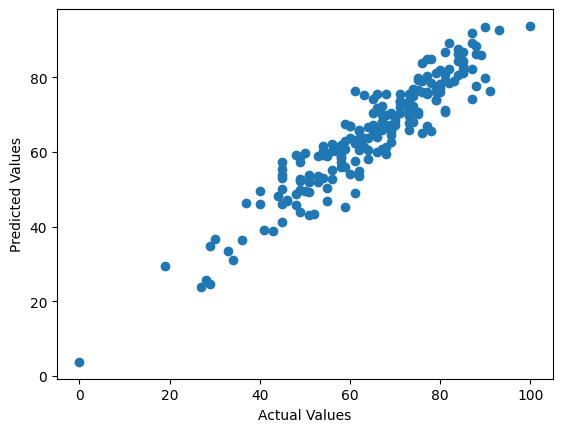

In [67]:
plt.scatter(y_test,y_pred)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")

In [70]:
pred_df = pd.DataFrame({"Actual Values": y_test, "Predicted Values": y_pred, "Difference": y_test-y_pred})

In [71]:
pred_df

,Actual Values,Predicted Values,Difference
521,91,76.387970,14.612030
737,53,58.885970,-5.885970
740,80,76.990265,3.009735
660,74,76.851804,-2.851804
411,84,87.627378,-3.627378
...,...,...,...
408,52,43.409149,8.590851
332,62,62.152214,-0.152214
208,74,67.888395,6.111605
613,65,67.022287,-2.022287
